#1. Linear Function


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
hare_speed = 1 #@param {type:"slider", min:0, max:10, step:1}

MAXVAL = 10
INTERVAL = MAXVAL + 1
h_xdata, h_ydata = [], []

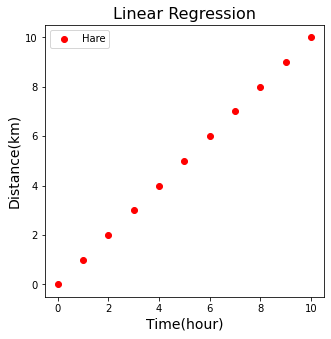

In [4]:
# Configure figure size
plt.figure(figsize=(5,5))

for t in np.linspace(0,MAXVAL,INTERVAL):
  h_y = hare_speed*t
  h_xdata.append(t)
  h_ydata.append(h_y)

plt.plot(h_xdata, h_ydata, 'ro', label='Hare')

plt.title("Linear Regression", fontsize=16)
plt.xlabel("Time(hour)", fontsize=14)
plt.ylabel("Distance(km)", fontsize=14)
plt.legend()

# show plot
plt.show()

#2. Hypothesis

In [5]:
velocity_variance = 0.2 #@param {type:"slider", min:0, max:2, step:0.1}
LINES= 5

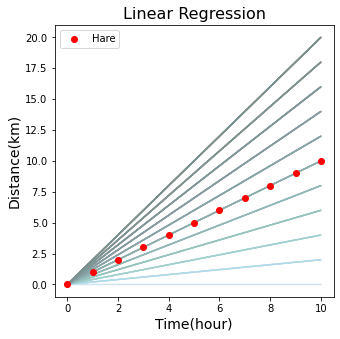

In [7]:
# Configure figure size
plt.figure(figsize=(5,5))

a_val = hare_speed + velocity_variance*LINES
h_xdata, h_ydata, v_xdata, v_ydata = [], [], [], []
for t in np.linspace(0,MAXVAL,INTERVAL):
  h_y = hare_speed*t
  h_xdata.append(t)
  h_ydata.append(h_y)
  a = a_val - (t*velocity_variance)
  for i in np.linspace(0,MAXVAL,INTERVAL):
    h_y = a*i
    v_xdata.append(i)
    v_ydata.append(h_y)
  plt.plot(v_xdata, v_ydata, alpha=0.2)

plt.plot(h_xdata, h_ydata, 'ro', label='Hare')

plt.title("Linear Regression", fontsize=16)
plt.xlabel("Time(hour)", fontsize=14)
plt.ylabel("Distance(km)", fontsize=14)
plt.legend()

# show plot
plt.show()

#3. Cost, Gradient Descent

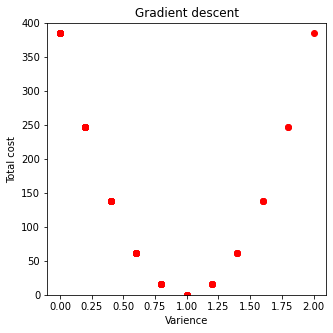

In [9]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

# configure figure size
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(0, 400)
t_xdata, t_ydata = [], []

def getCost(a_val):
  cost = 0
  for i in np.linspace(0,MAXVAL,INTERVAL):
    cost += pow((a_val*i-hare_speed*i),2)
  return cost

def animateFrame(frame):
  a_val = hare_speed + velocity_variance*LINES
  i = frame * velocity_variance
  a = a_val - i
  t_xdata.append(i)
  t_ydata.append(getCost(a))
  plot = ax.plot(t_xdata, t_ydata, 'ro')
  return plot

anim = animation.FuncAnimation(fig, animateFrame, frames=np.linspace(0,MAXVAL,INTERVAL), blit=True, repeat=False)

ax.set_title("Gradient descent")
ax.set_ylabel("Total cost")
ax.set_xlabel("Varience")

# show animation
anim